1) Kütüphane Ekleme

In [324]:
# Gerekli olan kütüphanelerin içe aktarılması
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

2) Veri Toplama ve Gözlemleme

In [325]:
# Veriyi yükleme ve ilk 5 satırı görüntüleme
data = pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv")
data.head(5)

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [326]:
#Veri kümesinin şekli, boyutu
print(f'Shape     : {data.shape}\n'
      f'Size      : {data.size}\n'
      f'Dimension : {data.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [327]:
# Veri kümesinde yer alan sütunlar
columns = data.columns
print(f"Veri kümesinin sütunları:{columns}")
data.columns.size

Veri kümesinin sütunları:Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


21

In [328]:
#Veri kümesi hakkında bilgi - (non-null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

3) Keşif Amaçlı Veri Analizi

In [329]:
# Veri setinin betimsel istatistiği
data.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946     401.26706     37.328178   
min        0.000000      0.000000       0.000000       0.00000   1196.000000   
25%        1.000000      1.000000     224.000000     102.00000   1940.000000   
50%        2.000000      2.000000     521.000000     136.00000   1970.000000   
75%        2.000000      2.000000     670.000000     188.00000   2000.000000   
max       12.000000     26.000000  433014.000000   44515.00000   2106.000000   

          Lattitude    Longtitude  Propertycount  
count  26881.000000  26881.000000   34854.000000  
mean     -37.810634    145.001851    7572.888306  
std        0.090279      0.120169    4428.090313  
min      -38.190430    144.423790      83.000000  
25%      -37.862950    144.933500    4385.000000  
50%      -37.807600    145.007800    6763.000000  
75%      -37.754100    145.071900   10412.000000  
max      -37.390200    145.526350   21650.000000

In [331]:
#Veri kümesinde yer alan verilerin tiplerinin kontrolü
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [332]:
data.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [333]:
#Veri kümesindeki boş değerlerin kontrolü ve kaç tane olduğu
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [334]:
# Kayıp değerleri doldurma
categorical_missing = ['Bathroom', 'Car',"Price", "Landsize", "BuildingArea", "YearBuilt",]
for column in categorical_missing:
    data[column] = data[column].fillna(data[column].mode().iloc[0])

In [335]:
# Eş olan verileri bulma
data.duplicated().sum()

1

In [336]:
# Eş olan veriyi getirmek için
data.loc[data.duplicated(keep=False), :]

Suburb        Address  Rooms Type     Price Method SellerG  \
15857  Nunawading  1/7 Lilian St      3    t  600000.0     SP  Jellis   
15858  Nunawading  1/7 Lilian St      3    t  600000.0     SP  Jellis   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
15857  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   
15858  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   

       BuildingArea  YearBuilt              CouncilArea Lattitude  Longtitude  \
15857         226.0     2000.0  Manningham City Council -37.82678   145.16777   
15858         226.0     2000.0  Manningham City Council -37.82678   145.16777   

                 Regionname Propertycount  
15857  Eastern Metropolitan        4973.0  
15858  Eastern Metropolitan        4973.0  

[2 rows x 21 columns]

In [337]:
# Eş olan veriyi kaldır
data.drop_duplicates(inplace=True)

In [338]:
# Eş olan değerlerin tekrar kontrolü
data.duplicated().sum()

0

In [339]:
# Eşsiz değer sayısını görmek için
data.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [341]:
# Object değerleri float64 değerlere dönüştürmek için
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Suburb'] = label_encoder.fit_transform(data['Suburb'])
data['Address'] = label_encoder.fit_transform(data['Address'])
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Method'] = label_encoder.fit_transform(data['Method'])
data['SellerG'] = label_encoder.fit_transform(data['SellerG'])
data['CouncilArea'] = label_encoder.fit_transform(data['CouncilArea'])
data['Regionname'] = label_encoder.fit_transform(data['Regionname'])

In [342]:
data

Suburb  Address  Rooms  Type      Price  Method  SellerG        Date  \
0           0    29458      2     0   600000.0       6      155   3/09/2016   
1           0    32512      2     0  1480000.0       2       33   3/12/2016   
2           0    15389      2     0  1035000.0       2       33   4/02/2016   
3           0     9768      3     2   600000.0       7      296   4/02/2016   
4           0    25128      3     0  1465000.0       5       33   4/03/2017   
...       ...      ...    ...   ...        ...     ...      ...         ...   
34852     348     5862      4     0  1480000.0       0      152  24/02/2018   
34853     348    16982      2     0   888000.0       5      321  24/02/2018   
34854     348     7350      2     1   705000.0       2      152  24/02/2018   
34855     348     5421      3     0  1140000.0       5      370  24/02/2018   
34856     348    17743      2     0  1020000.0       0      276  24/02/2018   

       Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0           2.5    3067.0  ...       1.0  1.0     126.0         120.0   
1           2.5    3067.0  ...       1.0  1.0     202.0         120.0   
2           2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3           2.5    3067.0  ...       2.0  1.0       0.0         120.0   
4           2.5    3067.0  ...       2.0  0.0     134.0         150.0   
...         ...       ...  ...       ...  ...       ...           ...   
34852       6.3    3013.0  ...       1.0  3.0     593.0         120.0   
34853       6.3    3013.0  ...       2.0  1.0      98.0         104.0   
34854       6.3    3013.0  ...       1.0  2.0     220.0         120.0   
34855       6.3    3013.0  ...       1.0  2.0       0.0         120.0   
34856       6.3    3013.0  ...       1.0  0.0     250.0         103.0   

       YearBuilt  CouncilArea  Lattitude  Longtitude  Regionname  \
0         1970.0           31  -37.80140   144.99580           2   
1         1970.0           31  -37.79960   144.99840           2   
2         1900.0           31  -37.80790   144.99340           2   
3         1970.0           31  -37.81140   145.01160           2   
4         1900.0           31  -37.80930   144.99440           2   
...          ...          ...        ...         ...         ...   
34852     1970.0           16  -37.81053   144.88467           6   
34853     2018.0           16  -37.81551   144.88826           6   
34854     2000.0           16  -37.82286   144.87856           6   
34855     1970.0           16        NaN         NaN           6   
34856     1930.0           16  -37.81810   144.89351           6   

       Propertycount  
0             4019.0  
1             4019.0  
2             4019.0  
3             4019.0  
4             4019.0  
...              ...  
34852         6543.0  
34853         6543.0  
34854         6543.0  
34855         6543.0  
34856         6543.0  

[34856 rows x 21 columns]

In [343]:
# Kayıp verilerin kontrolü
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         8217
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        7976
Longtitude       7976
Regionname          0
Propertycount       3
dtype: int64

In [347]:
#Kayıp olan verileri doldurma
categorical_missing = ["Bedroom2","Lattitude","Longtitude","Distance","Postcode","Propertycount"]
for column in categorical_missing:
    data[column] = data[column].fillna(data[column].mode().iloc[0])

In [348]:
#Son kayıp veri kontrolü
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [349]:
# Aykırı değerlerin kontrolü
import numpy as np

columns_to_check = ['Landsize', 'BuildingArea']

for column in columns_to_check:
  z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
  threshold = 3
  outliers = data[z_scores > threshold]

  print(outliers)

       Suburb  Address  Rooms  Type      Price  Method  SellerG        Date  \
1198       23    32953      3     0  2000000.0       7      165  28/08/2016   
3539       88    22529      3     2   950000.0       2      155   4/03/2017   
4149      128      175      3     0  1425000.0       2      205  25/02/2017   
6195      206     9178      2     2   352500.0       2      370  18/03/2017   
6591      209    24171      2     2   495000.0       2       42  18/03/2017   
7786      260    20980      2     2  1340000.0       7       69   3/12/2016   
7894      260     3938      2     1   600000.0       5      198  24/09/2016   
8599      265     6660      3     0   572000.0       2      279  23/04/2016   
9200      288    23623      1     2   315000.0       0      370   3/12/2016   
9215      288    26355      2     2   978500.0       2      370   4/03/2017   
9220      288    28770      2     2   600000.0       8       27   4/06/2016   
9271      288    15692      2     2   600000.0      

In [351]:
 #Aykırı değerleri temizlemek için
 import numpy as np

columns_to_clean = ["Landsize","BuildingArea"]

for columns in columns_to_clean:
  z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
  threshold = 3
  data = data[z_scores<=threshold]

In [352]:
#Bathroom ve car sütunlarındaki eksik verilerin kontrolü ve doldurulması
categorical_columns = ["Bathroom", "Car"]
for column in categorical_columns:
  data[column] = data[column].fillna(data[column].mode().iloc[0])

print(data)

       Suburb  Address  Rooms  Type      Price  Method  SellerG        Date  \
0           0    29458      2     0   600000.0       6      155   3/09/2016   
1           0    32512      2     0  1480000.0       2       33   3/12/2016   
2           0    15389      2     0  1035000.0       2       33   4/02/2016   
3           0     9768      3     2   600000.0       7      296   4/02/2016   
4           0    25128      3     0  1465000.0       5       33   4/03/2017   
...       ...      ...    ...   ...        ...     ...      ...         ...   
34852     348     5862      4     0  1480000.0       0      152  24/02/2018   
34853     348    16982      2     0   888000.0       5      321  24/02/2018   
34854     348     7350      2     1   705000.0       2      152  24/02/2018   
34855     348     5421      3     0  1140000.0       5      370  24/02/2018   
34856     348    17743      2     0  1020000.0       0      276  24/02/2018   

       Distance  Postcode  ...  Bathroom  Car  Land

4) Veri Görselleştirme

In [353]:
plt.hist(data.Price,bins=20,
         color="pink",label="Fiyat")

plt.xlabel("Fiyat")
plt.ylabel("Sayı")
plt.legend()
plt.title("Fiyat Histogramı")

plt.show()

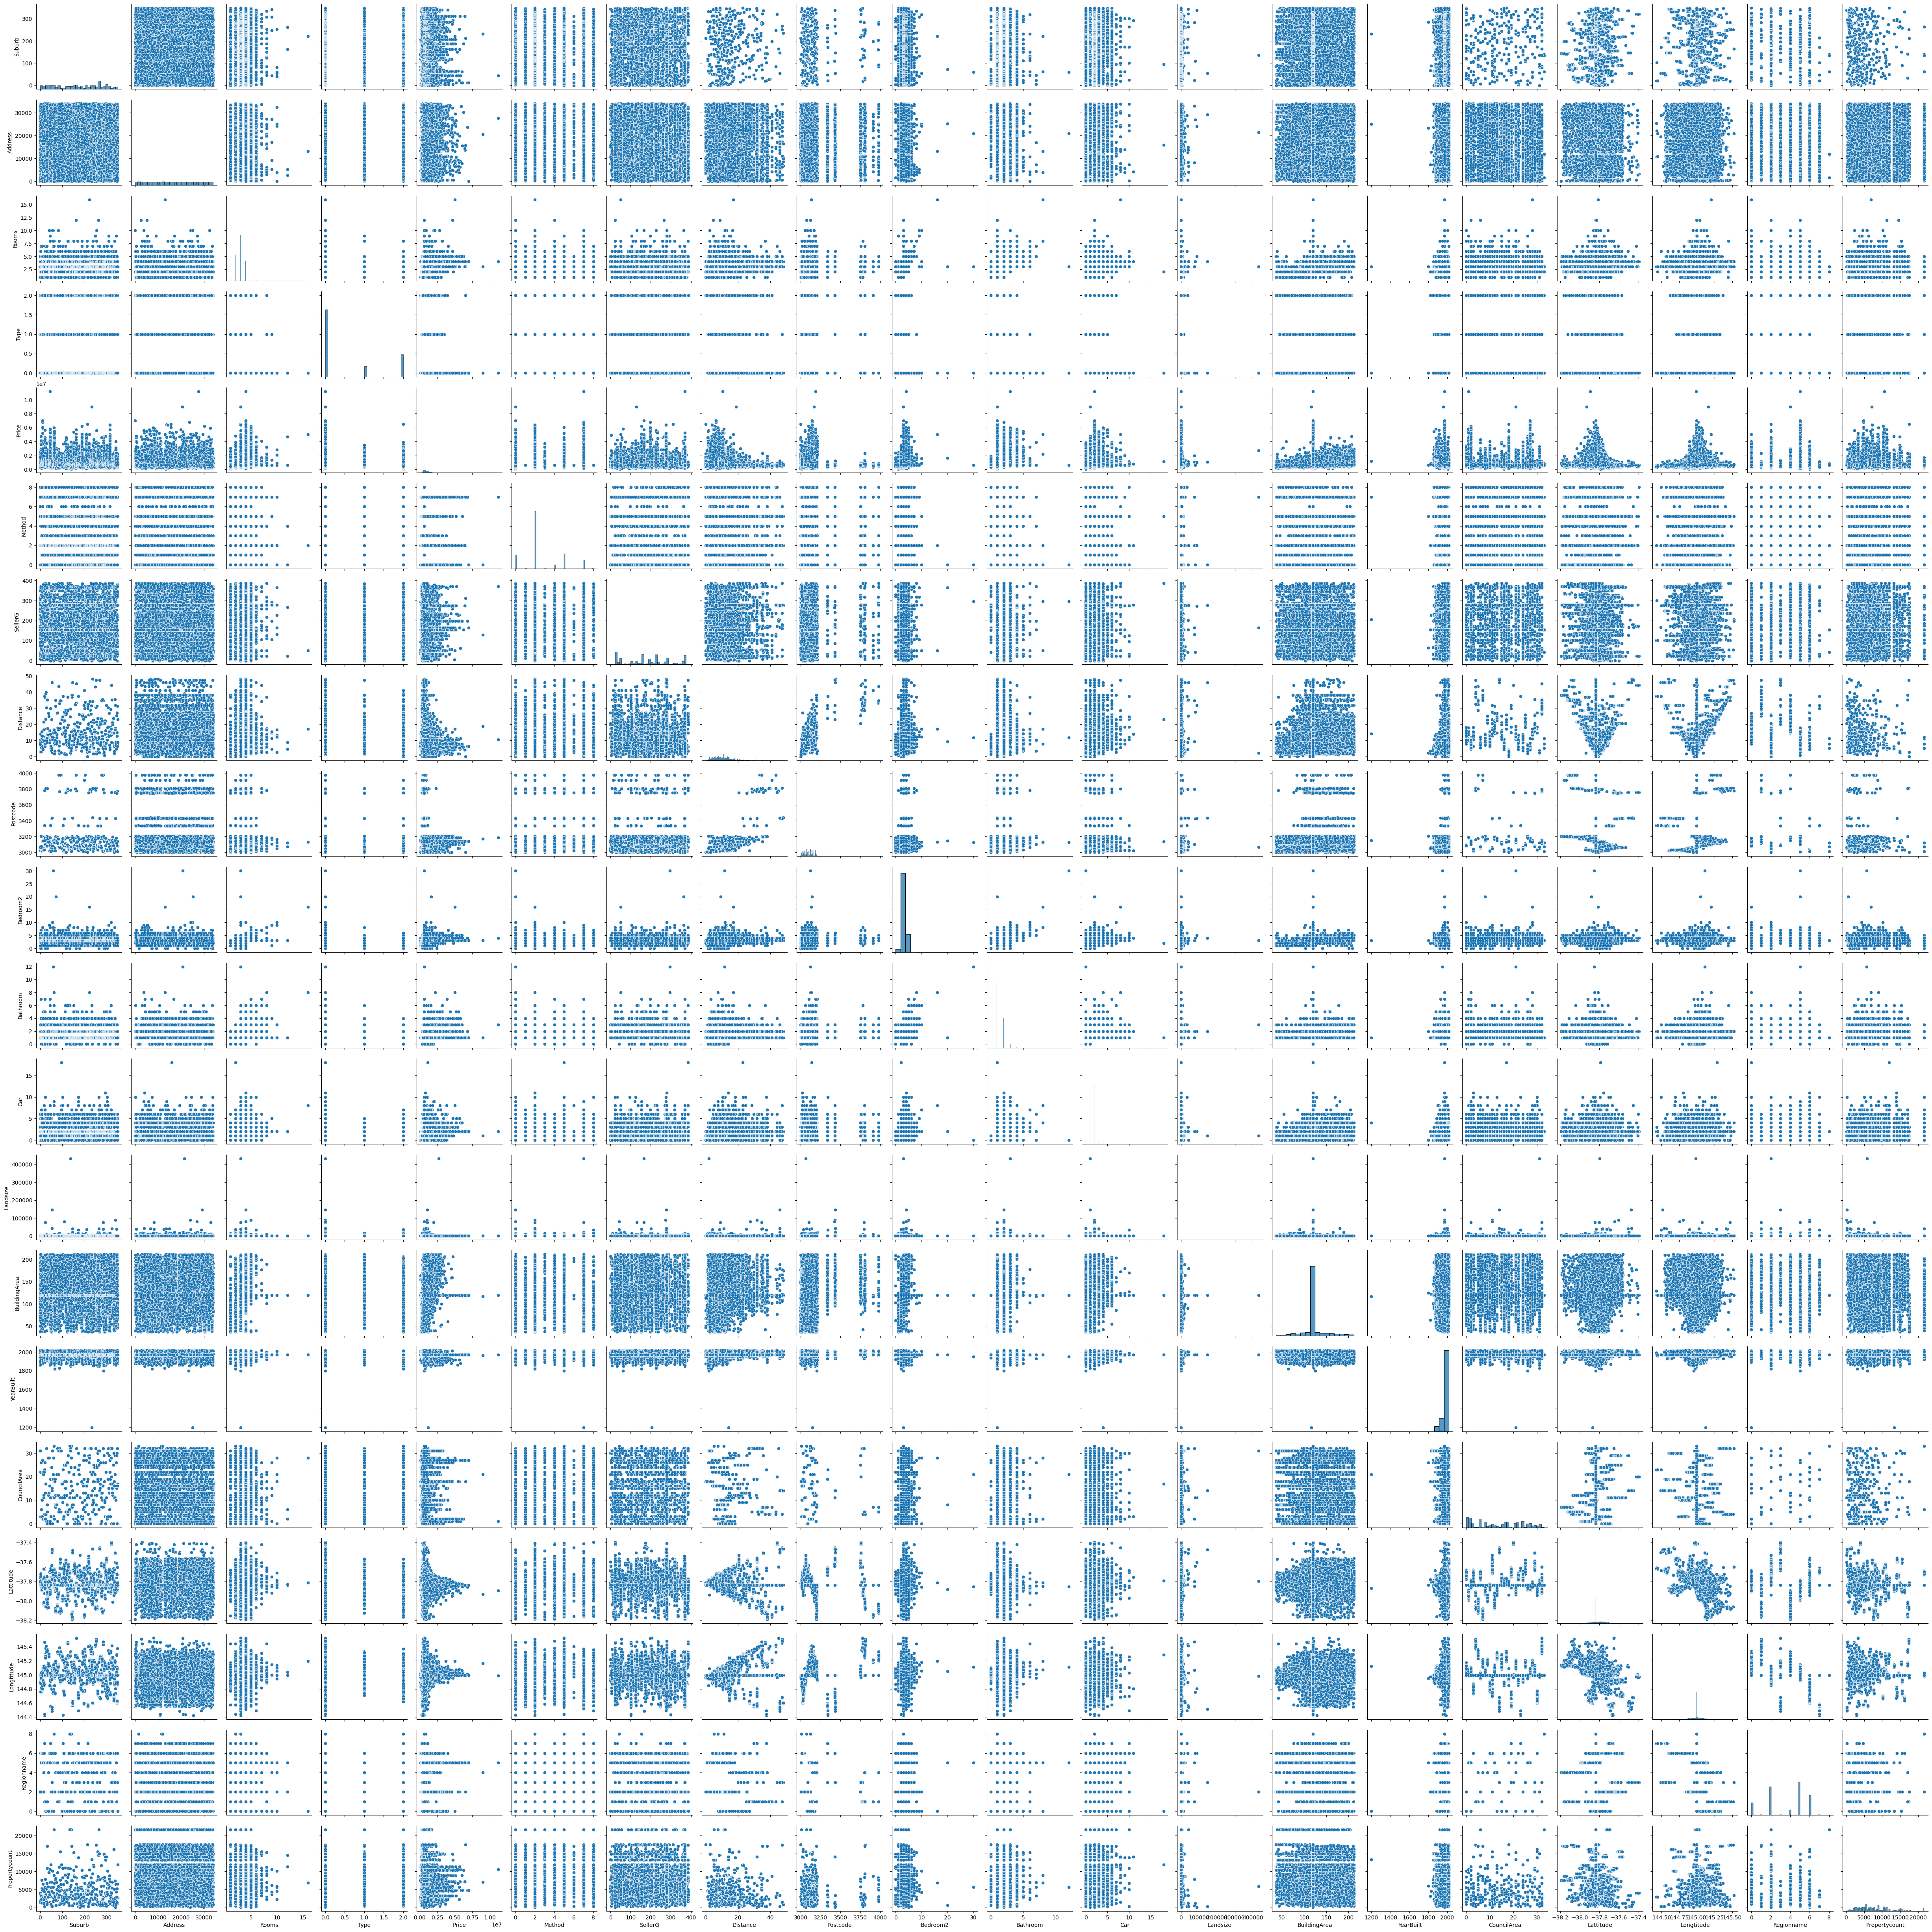

In [354]:
#Pair plot gösterim
import seaborn as sns

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

sns.pairplot(data, vars= numerical_columns)
plt.show()

<ipython-input-355-3c1ad24aa339>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


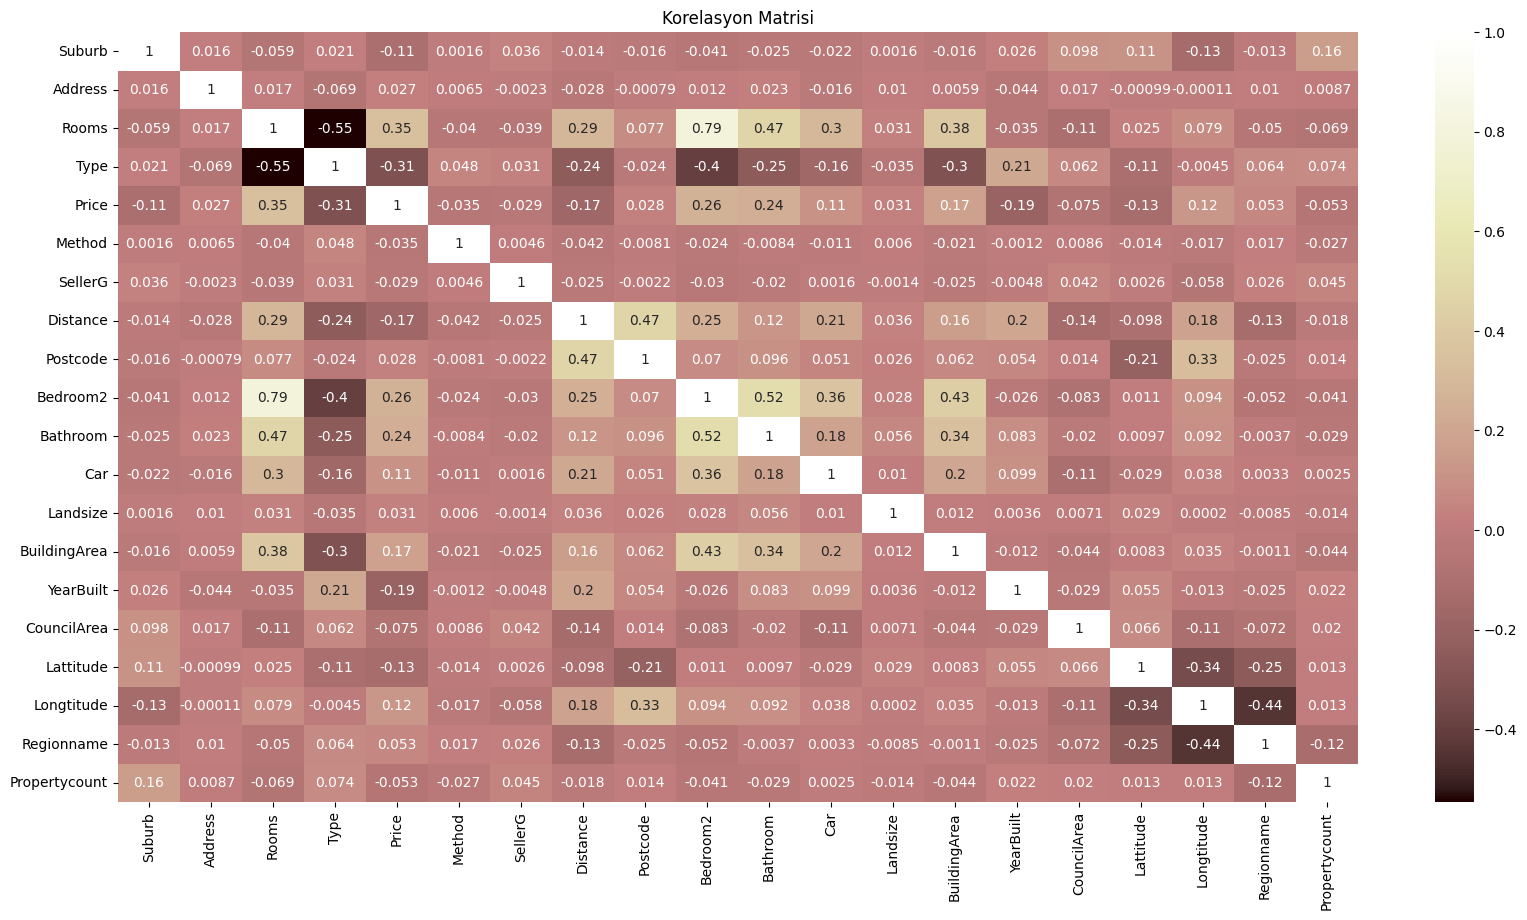

In [355]:
# Korelasyon matrix hesaplama
corr = data.corr()
plt.figure(figsize=(20,10))
plt.title('Korelasyon Matrisi')
sns.heatmap(corr, cmap="pink", annot=True);

In [356]:
#Kategorik değişkenlere Label Encoder uygulama
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

categorical_columns = ["Suburb", "Address", "Type", "Method", "SellerG", "CouncilArea", "Regionname"]
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [357]:
#Kategorik değişkenlere One Hot Encoder uygulama

def one_hot_encoder(dataframe, categorical_col):
  categorical_columns = ["Suburb", "Address", "Type", "Method", "SellerG", "CouncilArea", "Regionname"]
  dataframe = pd.get_dummies(dataframe, columns=categorical_col)
  return dataframe


5) Model Seçimi

In [358]:
# x ve y değişkenlerini tanımlama
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
x = data[numerical_columns]
y = data["Price"]

# train-test ile modeli bölme
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [359]:
#Verilen modeller ile verileri ele alma
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
},
  }


In [360]:
#Modelleri karşılaştırma
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

for model_name, model in models.items():
    model["model"].fit(x_train, y_train)
    y_pred = model["model"].predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    model["mae"] = mae
    model["mse"] = mse
    model["rmse"] = rmse
    model["r2"] = r2

for model_name, model in models.items():
    print(f"{model_name} Model - MAE: {model['mae']}, MSE: {model['mse']}, RMSE: {model['rmse']}, R2: {model['r2']}")

Lasso Model - MAE: 1.3334697944699112e-06, MSE: 3.703092781293216e-12, RMSE: 1.9243421684547724e-06, R2: 1.0
LinearRegression Model - MAE: 3.7841325235030787e-10, MSE: 3.781907789515792e-19, RMSE: 6.149721773800659e-10, R2: 1.0
Ridge Model - MAE: 5.575960316083045e-10, MSE: 5.612609688713236e-19, RMSE: 7.49173523872356e-10, R2: 1.0
ElasticNet Model - MAE: 1.158148119457587e-05, MSE: 1.8037962526017155e-10, RMSE: 1.3430548211453304e-05, R2: 1.0
KNeighborsRegressor Model - MAE: 684.7925868244821, MSE: 15321194.438099984, RMSE: 3914.2297375218004, R2: 0.9999494215995998
RandomForestRegressor Model - MAE: 355.5926008409905, MSE: 40996827.86515912, RMSE: 6402.876530525879, R2: 0.9998646610756571
GradientBoostingRegressor Model - MAE: 3112.8764219920276, MSE: 39206694.72858151, RMSE: 6261.524952324435, R2: 0.9998705706717343
AdaBoostRegressor Model - MAE: 55356.444415175756, MSE: 7056713674.217646, RMSE: 84004.24795340796, R2: 0.9767043430480489


In [361]:
# Karşılaştırılan modellerin sonuçlarını elde etme

results_data = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
best_model = results_data.sort_values(by='MAE').iloc[0]

print(results_data)
print("En İyi Performansı Gösteren Model:")
print(best_model)

               Model           MAE           MSE           RMSE        R2
0  AdaBoostRegressor  66645.729355  1.048541e+10  102398.278134  0.969122
En İyi Performansı Gösteren Model:
Model     AdaBoostRegressor
MAE            66645.729355
MSE      10485407364.857021
RMSE          102398.278134
R2                 0.969122
Name: 0, dtype: object
